In [1]:
import tensorflow as tf

physical_devices = tf.config.experimental.list_physical_devices('GPU')
assert len(physical_devices) > 0, "Not enough GPU hardware devices available"
config = tf.config.experimental.set_memory_growth(physical_devices[0], True)

2023-07-13 13:17:25.548869: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-13 13:17:26.672791: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-07-13 13:17:27.992427: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-07-13 13:17:28.031271: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA n

In [2]:

#Getting the data

import json
from bs4 import BeautifulSoup
from stopwards import stop_wards
import string
import matplotlib.pyplot as plt

# Our data is a json file containing json objects line by line 

datastore = []

with open("./Sarcasm_Headlines_Dataset.json", 'r') as file:
    for line in file:
        line = line.strip()
        if line:
            data = json.loads(line)
            datastore.append(data)



In [3]:
headlines = []
labels = []
articles = []

stopwords = stop_wards()
table = str.maketrans('','',string.punctuation)

for item in datastore:
    sentence = item['headline'].lower()

    # seperating the pucntuations 
    sentence = sentence.replace(","," , ")
    sentence = sentence.replace("."," . ")
    sentence = sentence.replace("-"," - ")
    sentence = sentence.replace("/"," / ")

    # stripping off the html content

    soup = BeautifulSoup(sentence)
    sentence = soup.get_text()
    words = sentence.split()
    filtered_sentence = ""
    
    for word in words:
        if word not in stopwords:
            filtered_sentence = filtered_sentence + word +" "
    headlines.append(filtered_sentence)
    labels.append(item['is_sarcastic'])
    articles.append(item['article_link'])

In [4]:

print(len(headlines)
,len(labels))

26709 26709


In [5]:
# Splitting the data for training and testing

training_headlines = headlines[0:23000]
testing_headlines = headlines[23000:]
training_labels = labels[0:23000]
testing_labels = labels[23000:]

In [6]:
# tokenisation 
max_words = 20000
max_length = 12
padding = "post"
truncating = "post"
oov_tok = "<OOV>"

# Importing tokenizer
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


tokenizer = Tokenizer(num_words = max_words,oov_token=oov_tok)
tokenizer.fit_on_texts(training_headlines)
training_headlines_sequences = tokenizer.texts_to_sequences(training_headlines)
testing_headlines_sequences = tokenizer.texts_to_sequences(testing_headlines)
 
padded_training_headlines = pad_sequences(training_headlines_sequences,maxlen=max_length,padding=padding,truncating=truncating)
padded_testing_headlines = pad_sequences(testing_headlines_sequences,maxlen=max_length,padding=padding,truncating=truncating)




In [7]:
import numpy as np

training_padded = np.array(padded_training_headlines)
testing_padded = np.array(padded_testing_headlines)
training_labels_array = np.array(training_labels)
testing_labels_array = np.array(testing_labels)


In [8]:
# Defining the model

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(10000,16),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

2023-07-10 01:32:59.910420: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-07-10 01:32:59.910859: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-07-10 01:32:59.911191: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [29]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [30]:
history = model.fit(padded_training_headlines,training_labels_array,epochs=30,validation_data=(padded_testing_headlines,testing_labels_array))

Epoch 1/30


2023-07-10 01:31:12.583987: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x55c84c786c80 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-07-10 01:31:12.584013: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): NVIDIA GeForce GTX 1650, Compute Capability 7.5
2023-07-10 01:31:12.588910: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-07-10 01:31:12.757968: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8600
2023-07-10 01:31:12.812338: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-07-10 01:31:12.876324: I ./tensorflow/compiler/jit/device_compiler.h:180] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


719/719 [==============================] - 14s 17ms/step - loss: 0.5506 - accuracy: 0.7096 - val_loss: 0.4321 - val_accuracy: 0.7962
Epoch 2/30
719/719 [==============================] - 3s 5ms/step - loss: 0.3349 - accuracy: 0.8543 - val_loss: 0.4169 - val_accuracy: 0.8102
Epoch 3/30
719/719 [==============================] - 3s 4ms/step - loss: 0.2639 - accuracy: 0.8910 - val_loss: 0.4490 - val_accuracy: 0.8002
Epoch 4/30
719/719 [==============================] - 2s 3ms/step - loss: 0.2255 - accuracy: 0.9092 - val_loss: 0.4880 - val_accuracy: 0.8010
Epoch 5/30
719/719 [==============================] - 2s 3ms/step - loss: 0.1986 - accuracy: 0.9233 - val_loss: 0.5391 - val_accuracy: 0.7948
Epoch 6/30
719/719 [==============================] - 2s 3ms/step - loss: 0.1804 - accuracy: 0.9297 - val_loss: 0.5823 - val_accuracy: 0.7892
Epoch 7/30
719/719 [==============================] - 2s 3ms/step - loss: 0.1647 - accuracy: 0.9363 - val_loss: 0.6377 - val_accuracy: 0.7816
Epoch 8/30
719/

In [31]:
# our model is clearly overfitting

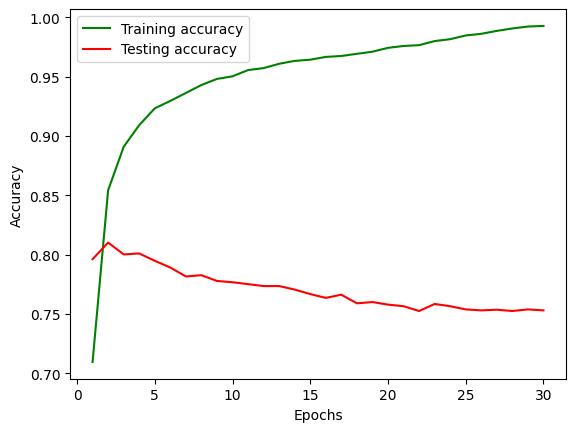

In [32]:
# data visualisation




train_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
epochs = range(1,31)
plt.plot(epochs,train_accuracy,"g",label="Training accuracy")
plt.plot(epochs,validation_accuracy,'r',label="Testing accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [9]:
# Now trying to change the learning rate of the optmizer

adam = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='binary_crossentropy',optimizer=adam,metrics=["accuracy"])

history2 = model.fit(padded_training_headlines,training_labels_array,epochs=30,validation_data=(padded_testing_headlines,testing_labels_array))

Epoch 1/30


2023-07-10 01:33:07.902917: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x7f59c4042cb0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-07-10 01:33:07.902942: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): NVIDIA GeForce GTX 1650, Compute Capability 7.5
2023-07-10 01:33:07.906066: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-07-10 01:33:08.032724: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8600
2023-07-10 01:33:08.089899: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-07-10 01:33:08.155771: I ./tensorflow/compiler/jit/device_compiler.h:180] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


719/719 [==============================] - 14s 17ms/step - loss: 0.6890 - accuracy: 0.5448 - val_loss: 0.6802 - val_accuracy: 0.5702
Epoch 2/30
719/719 [==============================] - 3s 4ms/step - loss: 0.6683 - accuracy: 0.5839 - val_loss: 0.6516 - val_accuracy: 0.6282
Epoch 3/30
719/719 [==============================] - 2s 3ms/step - loss: 0.6292 - accuracy: 0.6780 - val_loss: 0.6096 - val_accuracy: 0.7212
Epoch 4/30
719/719 [==============================] - 3s 4ms/step - loss: 0.5738 - accuracy: 0.7522 - val_loss: 0.5586 - val_accuracy: 0.7654
Epoch 5/30
719/719 [==============================] - 2s 3ms/step - loss: 0.5128 - accuracy: 0.7960 - val_loss: 0.5119 - val_accuracy: 0.7770
Epoch 6/30
719/719 [==============================] - 2s 3ms/step - loss: 0.4583 - accuracy: 0.8230 - val_loss: 0.4752 - val_accuracy: 0.7859
Epoch 7/30
719/719 [==============================] - 2s 3ms/step - loss: 0.4138 - accuracy: 0.8408 - val_loss: 0.4495 - val_accuracy: 0.7937
Epoch 8/30
719/

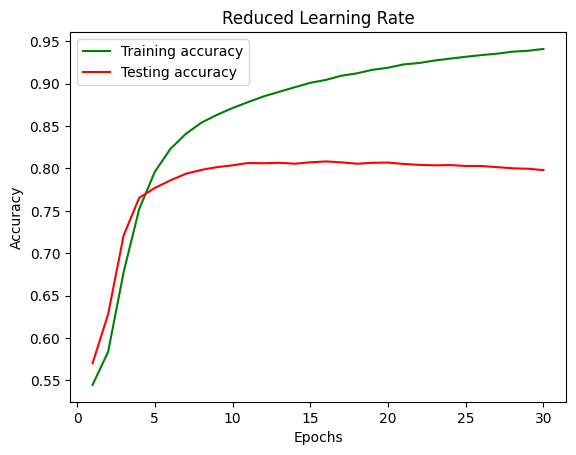

In [10]:


train_accuracy = history2.history['accuracy']
validation_accuracy = history2.history['val_accuracy']
epochs = range(1,31)
plt.title("Reduced Learning Rate")
plt.plot(epochs,train_accuracy,"g",label="Training accuracy")
plt.plot(epochs,validation_accuracy,'r',label="Testing accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [11]:
# This is much better than Default learning rate of adam which is 0.001 

In [12]:
# Looking at the frequency of the words in training 

wc = tokenizer.word_counts

from collections import OrderedDict

countlist = (OrderedDict(sorted(wc.items(),key=lambda t: t[1] , reverse=True)))

print(countlist)



OrderedDict([('new', 1301), ('trump', 1103), ('man', 1064), ('who', 500), ('just', 493), ('will', 481), ('year', 435), ('report', 434), ('area', 421), ('donald', 404), ('day', 392), ('can', 385), ('says', 384), ('first', 373), ('woman', 366), ('like', 353), ('time', 348), ('old', 331), ("trump's", 329), ('now', 322), ('obama', 316), ('life', 307), ('people', 297), ('women', 285), ('house', 278), ("'", 277), ('still', 274), ('white', 273), ('back', 268), ('down', 263), ('clinton', 262), ('5', 256), ('world', 245), ('americans', 242), ('way', 237), ('study', 225), ('family', 219), ('gop', 217), ('black', 213), ("it's", 211), ('best', 211), ('bill', 209), ('school', 206), ('police', 205), ('watch', 204), ('years', 202), ('3', 201), ('only', 200), ('being', 198), ('video', 194), ('finds', 194), ('american', 192), ('last', 192), ('know', 192), ('10', 191), ('president', 190), ('home', 190), ('death', 189), ("can't", 189), ('going', 187), ('state', 187), ('show', 183), ('hillary', 183), ('na

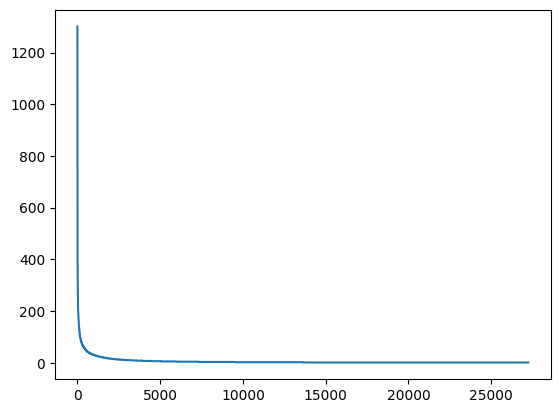

In [13]:
# Lets check how many words are too repetitive

x = []
y = []

current_item = 1

for item in countlist:
    x.append(current_item)
    y.append(countlist[item])
    current_item = current_item+1

# Lets visulise this

plt.plot(x,y)
plt.show()


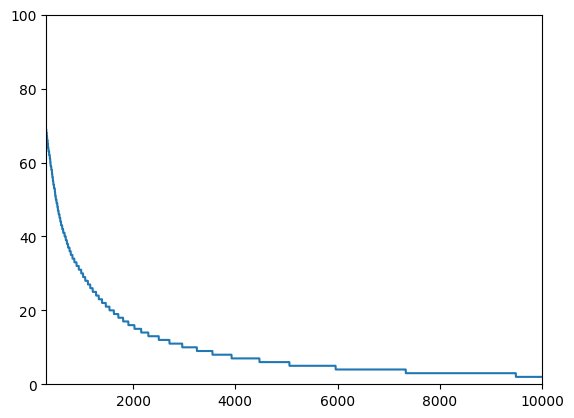

In [20]:
# Lets take a closer look
# lets look at 300-10000 words with 0-100 in the y axis

plt.plot(x,y)
plt.axis([300,10000,0,100])
plt.show()

In [8]:
# As we can see 2000-10000  , the words are repeated less than 20 times
# lets retrain the model for 2000 words 

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(2000,16),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

adam = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='binary_crossentropy',optimizer=adam,metrics=["accuracy"])

2023-07-10 01:38:40.471929: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-07-10 01:38:40.472385: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-07-10 01:38:40.472744: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

Epoch 1/30


2023-07-10 01:39:39.784945: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x7f37a94c8950 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-07-10 01:39:39.784980: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): NVIDIA GeForce GTX 1650, Compute Capability 7.5
2023-07-10 01:39:39.788548: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-07-10 01:39:39.910809: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8600
2023-07-10 01:39:39.958638: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-07-10 01:39:40.027405: I ./tensorflow/compiler/jit/device_compiler.h:180] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


719/719 [==============================] - 13s 16ms/step - loss: 0.6846 - accuracy: 0.5602 - val_loss: 0.6749 - val_accuracy: 0.5719
Epoch 2/30
719/719 [==============================] - 3s 4ms/step - loss: 0.6667 - accuracy: 0.5881 - val_loss: 0.6521 - val_accuracy: 0.6223
Epoch 3/30
719/719 [==============================] - 3s 3ms/step - loss: 0.6358 - accuracy: 0.6614 - val_loss: 0.6161 - val_accuracy: 0.6948
Epoch 4/30
719/719 [==============================] - 2s 3ms/step - loss: 0.5923 - accuracy: 0.7186 - val_loss: 0.5740 - val_accuracy: 0.7479
Epoch 5/30
719/719 [==============================] - 2s 3ms/step - loss: 0.5464 - accuracy: 0.7517 - val_loss: 0.5356 - val_accuracy: 0.7587
Epoch 6/30
719/719 [==============================] - 2s 3ms/step - loss: 0.5075 - accuracy: 0.7727 - val_loss: 0.5069 - val_accuracy: 0.7598
Epoch 7/30
719/719 [==============================] - 2s 3ms/step - loss: 0.4781 - accuracy: 0.7853 - val_loss: 0.4877 - val_accuracy: 0.7687
Epoch 8/30
719/

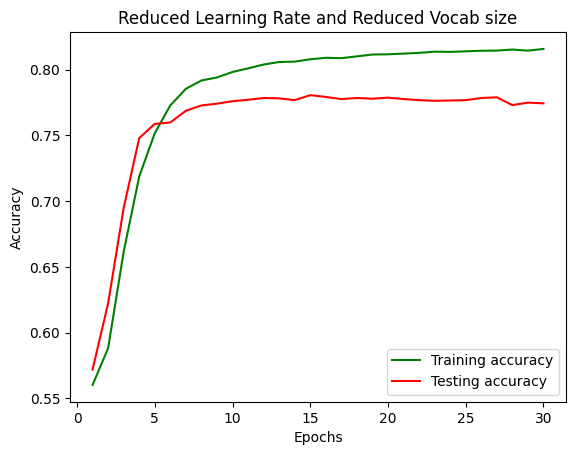

In [9]:
history3 = model.fit(padded_training_headlines,training_labels_array,epochs=30,validation_data=(padded_testing_headlines,testing_labels_array))

train_accuracy = history3.history['accuracy']
validation_accuracy = history3.history['val_accuracy']
epochs = range(1,31)
plt.title("Reduced Learning Rate and Reduced Vocab size")
plt.plot(epochs,train_accuracy,"g",label="Training accuracy")
plt.plot(epochs,validation_accuracy,'r',label="Testing accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [10]:
# Overfitting is very much reduced but still accuracy can be improved

In [11]:
# We are training only 2000 words but we are encoding it in 16 dimensions Best practice is to set dimensions 
# Fourth root of 2000 it is around 7 and also reducing the neurons in the third layer to 8 and increase the epcohs

In [16]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(2000,7),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(8,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

adam = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='binary_crossentropy',optimizer=adam,metrics=["accuracy"])

Epoch 1/100


2023-07-10 01:45:46.439204: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x7fd97c011cf0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-07-10 01:45:46.439232: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): NVIDIA GeForce GTX 1650, Compute Capability 7.5
2023-07-10 01:45:46.443174: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-07-10 01:45:46.575339: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8600
2023-07-10 01:45:46.627578: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-07-10 01:45:46.682022: I ./tensorflow/compiler/jit/device_compiler.h:180] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


719/719 [==============================] - 13s 16ms/step - loss: 0.6908 - accuracy: 0.5502 - val_loss: 0.6874 - val_accuracy: 0.5700
Epoch 2/100
719/719 [==============================] - 3s 4ms/step - loss: 0.6833 - accuracy: 0.5596 - val_loss: 0.6773 - val_accuracy: 0.5700
Epoch 3/100
719/719 [==============================] - 3s 4ms/step - loss: 0.6747 - accuracy: 0.5601 - val_loss: 0.6682 - val_accuracy: 0.5737
Epoch 4/100
719/719 [==============================] - 2s 3ms/step - loss: 0.6648 - accuracy: 0.5768 - val_loss: 0.6574 - val_accuracy: 0.5996
Epoch 5/100
719/719 [==============================] - 2s 3ms/step - loss: 0.6520 - accuracy: 0.6163 - val_loss: 0.6441 - val_accuracy: 0.6463
Epoch 6/100
719/719 [==============================] - 2s 3ms/step - loss: 0.6363 - accuracy: 0.6562 - val_loss: 0.6282 - val_accuracy: 0.6773
Epoch 7/100
719/719 [==============================] - 2s 3ms/step - loss: 0.6181 - accuracy: 0.6920 - val_loss: 0.6096 - val_accuracy: 0.7161
Epoch 8/1

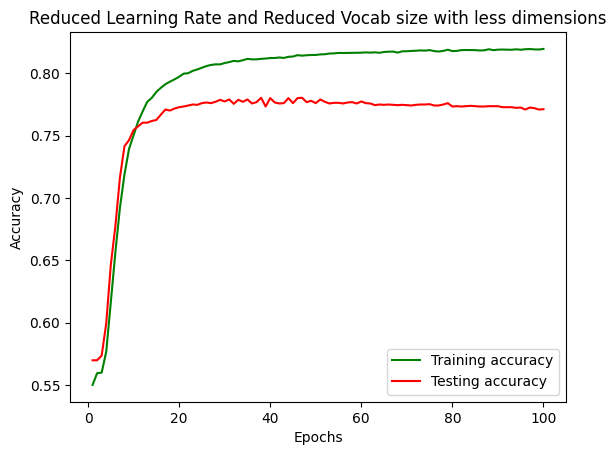

In [9]:
history4 = model.fit(padded_training_headlines,training_labels_array,epochs=100,validation_data=(padded_testing_headlines,testing_labels_array))

train_accuracy = history4.history['accuracy']
validation_accuracy = history4.history['val_accuracy']
epochs = range(1,101)
plt.title("Reduced Learning Rate and Reduced Vocab size with less dimensions")
plt.plot(epochs,train_accuracy,"g",label="Training accuracy")
plt.plot(epochs,validation_accuracy,'r',label="Testing accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [10]:
# Jitters indicate that our model is converging and its a pretty good sign
# Introducing dropout is a bad idea since we are using only 8 neurons in our dense layer

In [12]:
# Now comes the prediction part

newsentences = ["granny starting to fear spiders in the garden might be real", 
             "game of thrones season finale showing this sunday night", 
             "TensorFlow book will be a best seller"]

newsequences = tokenizer.texts_to_sequences(newsentences)
padded_newsequences = pad_sequences(newsequences,maxlen=max_length,padding=padding,truncating=truncating)

print(model.predict(padded_newsequences))

1/1 [==============================] - 0s 16ms/step
[[0.91909766]
 [0.04685564]
 [0.0375884 ]]


In [9]:
# As from the above result , it is clear that our model gives a very postitive score for first line which is sarcastic 

In [10]:
# Getting into RNNs

In [8]:
#Introducing LSTMs ----> No aggregation needed
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(20000,64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(24,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

2023-07-13 11:29:16.713250: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-07-13 11:29:16.713583: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-07-13 11:29:16.713748: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [9]:
adam = tf.keras.optimizers.Adam(learning_rate=0.00001)
model.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'])



In [10]:
history5 = model.fit(padded_training_headlines,training_labels_array,epochs=30,validation_data=(padded_testing_headlines,testing_labels_array))


Epoch 1/30


2023-07-13 11:29:21.886614: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-07-13 11:29:21.887707: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-07-13 11:29:21.888561: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

718/719 [============================>.] - ETA: 0s - loss: 0.6895 - accuracy: 0.5681

2023-07-13 11:29:40.146022: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-07-13 11:29:40.147208: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-07-13 11:29:40.147933: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

719/719 [==============================] - 19s 20ms/step - loss: 0.6895 - accuracy: 0.5682 - val_loss: 0.6867 - val_accuracy: 0.5721
Epoch 2/30
719/719 [==============================] - 4s 6ms/step - loss: 0.6851 - accuracy: 0.5633 - val_loss: 0.6821 - val_accuracy: 0.5713
Epoch 3/30
719/719 [==============================] - 4s 6ms/step - loss: 0.6809 - accuracy: 0.5632 - val_loss: 0.6777 - val_accuracy: 0.5735
Epoch 4/30
719/719 [==============================] - 4s 6ms/step - loss: 0.6765 - accuracy: 0.5656 - val_loss: 0.6733 - val_accuracy: 0.5748
Epoch 5/30
719/719 [==============================] - 4s 6ms/step - loss: 0.6720 - accuracy: 0.5695 - val_loss: 0.6688 - val_accuracy: 0.5794
Epoch 6/30
719/719 [==============================] - 4s 6ms/step - loss: 0.6670 - accuracy: 0.5773 - val_loss: 0.6640 - val_accuracy: 0.5856
Epoch 7/30
719/719 [==============================] - 4s 5ms/step - loss: 0.6613 - accuracy: 0.5882 - val_loss: 0.6586 - val_accuracy: 0.5950
Epoch 8/30
719/

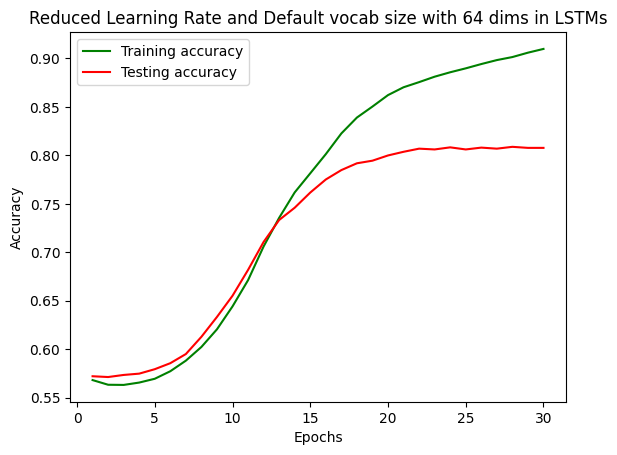

In [12]:
train_accuracy = history5.history['accuracy']
validation_accuracy = history5.history['val_accuracy']
epochs = range(1,31)
plt.title("Reduced Learning Rate and Default vocab size with 64 dims in LSTMs")
plt.plot(epochs,train_accuracy,"g",label="Training accuracy")
plt.plot(epochs,validation_accuracy,'r',label="Testing accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

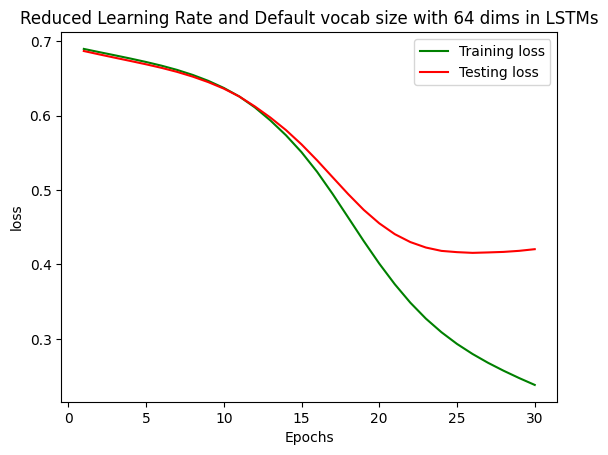

In [13]:
# Now seeing the loss

train_loss = history5.history['loss']
validation_loss = history5.history['val_loss']
epochs = range(1,31)
plt.title("Reduced Learning Rate and Default vocab size with 64 dims in LSTMs")
plt.plot(epochs,train_loss,"g",label="Training loss")
plt.plot(epochs,validation_loss,'r',label="Testing loss")
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

In [14]:
# Its overfitting but with LSTMs its far more impresive with vocab_size of 20000 and dim of 64 

In [8]:
# Now moving onto stacking LLMs

model  = tf.keras.Sequential([
    tf.keras.layers.Embedding(20000,64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(24,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model.summary()

2023-07-13 12:01:37.810554: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-07-13 12:01:37.810811: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-07-13 12:01:37.810955: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          1280000   
                                                                 
 bidirectional (Bidirectiona  (None, None, 128)        66048     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              98816     
 nal)                                                            
                                                                 
 dense (Dense)               (None, 24)                3096      
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 1,447,985
Trainable params: 1,447,985
Non-

2023-07-13 12:01:39.415028: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/ReverseV2_grad/ReverseV2/ReverseV2/axis' with dtype int32 and shape [1]
	 [[{{node gradients/ReverseV2_grad/ReverseV2/ReverseV2/axis}}]]
2023-07-13 12:01:39.444008: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-07-13 12:01:39.444797: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message):

In [9]:
adam = tf.keras.optimizers.Adam(learning_rate=0.00001)
model.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'])


In [10]:
history6  = model.fit(padded_training_headlines,training_labels_array,epochs=30,validation_data=(padded_testing_headlines,testing_labels_array))

Epoch 1/30


2023-07-13 11:42:20.582609: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-07-13 11:42:20.583773: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-07-13 11:42:20.584638: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

719/719 [==============================] - ETA: 0s - loss: 0.6893 - accuracy: 0.5580

2023-07-13 11:42:40.398609: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-07-13 11:42:40.399779: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-07-13 11:42:40.400536: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

719/719 [==============================] - 21s 22ms/step - loss: 0.6893 - accuracy: 0.5580 - val_loss: 0.6827 - val_accuracy: 0.5700
Epoch 2/30
719/719 [==============================] - 6s 9ms/step - loss: 0.6803 - accuracy: 0.5596 - val_loss: 0.6737 - val_accuracy: 0.5702
Epoch 3/30
719/719 [==============================] - 6s 8ms/step - loss: 0.6713 - accuracy: 0.5668 - val_loss: 0.6601 - val_accuracy: 0.5961
Epoch 4/30
719/719 [==============================] - 5s 7ms/step - loss: 0.6281 - accuracy: 0.6609 - val_loss: 0.5736 - val_accuracy: 0.7272
Epoch 5/30
719/719 [==============================] - 5s 7ms/step - loss: 0.4947 - accuracy: 0.7682 - val_loss: 0.4964 - val_accuracy: 0.7557
Epoch 6/30
719/719 [==============================] - 6s 8ms/step - loss: 0.4267 - accuracy: 0.8050 - val_loss: 0.4816 - val_accuracy: 0.7665
Epoch 7/30
719/719 [==============================] - 6s 8ms/step - loss: 0.3943 - accuracy: 0.8255 - val_loss: 0.4719 - val_accuracy: 0.7768
Epoch 8/30
719/

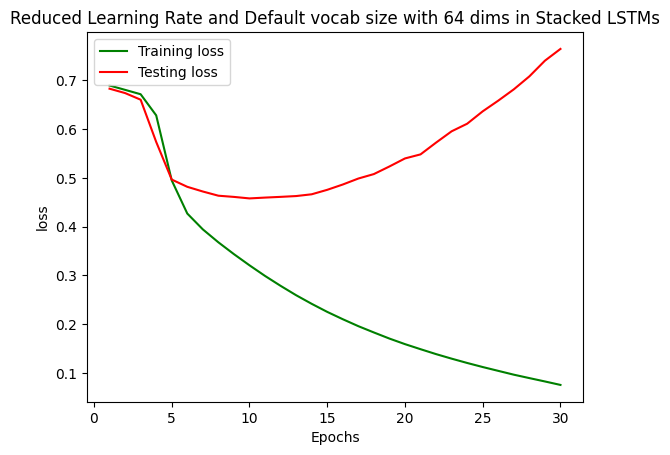

In [11]:
train_loss = history6.history['loss']
validation_loss = history6.history['val_loss']
epochs = range(1,31)
plt.title("Reduced Learning Rate and Default vocab size with 64 dims in Stacked LSTMs")
plt.plot(epochs,train_loss,"g",label="Training loss")
plt.plot(epochs,validation_loss,'r',label="Testing loss")
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

In [12]:
# Clearly the model is overfitting , The valid loss is shooting up after certain epochs 

Epoch 1/30


2023-07-13 12:02:02.395341: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-07-13 12:02:02.396563: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-07-13 12:02:02.397362: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

719/719 [==============================] - ETA: 0s - loss: 0.6897 - accuracy: 0.5611

2023-07-13 12:02:21.967671: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-07-13 12:02:21.968947: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-07-13 12:02:21.969692: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

719/719 [==============================] - 21s 22ms/step - loss: 0.6897 - accuracy: 0.5611 - val_loss: 0.6850 - val_accuracy: 0.5700
Epoch 2/30
719/719 [==============================] - 6s 9ms/step - loss: 0.6833 - accuracy: 0.5596 - val_loss: 0.6784 - val_accuracy: 0.5702
Epoch 3/30
719/719 [==============================] - 6s 9ms/step - loss: 0.6791 - accuracy: 0.5600 - val_loss: 0.6743 - val_accuracy: 0.5724
Epoch 4/30
719/719 [==============================] - 6s 8ms/step - loss: 0.6740 - accuracy: 0.5728 - val_loss: 0.6676 - val_accuracy: 0.5926
Epoch 5/30
719/719 [==============================] - 5s 7ms/step - loss: 0.6609 - accuracy: 0.6118 - val_loss: 0.6477 - val_accuracy: 0.6490
Epoch 6/30
719/719 [==============================] - 5s 7ms/step - loss: 0.6129 - accuracy: 0.6986 - val_loss: 0.5780 - val_accuracy: 0.7226
Epoch 7/30
719/719 [==============================] - 5s 7ms/step - loss: 0.5067 - accuracy: 0.7669 - val_loss: 0.5141 - val_accuracy: 0.7412
Epoch 8/30
719/

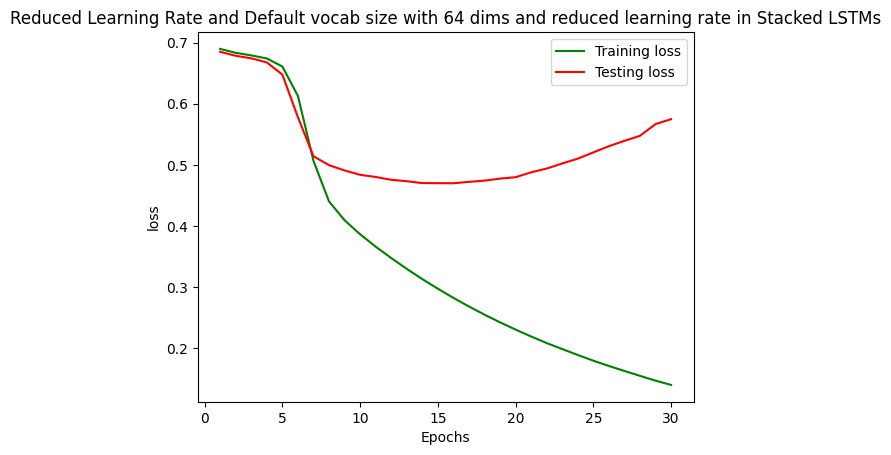

In [9]:
#optmising Stacked LSTMs

# reducing the learning rate , lets reduce it to 0.000007

adam = tf.keras.optimizers.Adam(learning_rate=0.000007)
model.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'])

history7 = model.fit(padded_training_headlines,training_labels_array,epochs=30,validation_data=(padded_testing_headlines,testing_labels_array))

train_loss = history7.history['loss']
validation_loss = history7.history['val_loss']
epochs = range(1,31)
plt.title("Reduced Learning Rate and Default vocab size with 64 dims and reduced learning rate in Stacked LSTMs")
plt.plot(epochs,train_loss,"g",label="Training loss")
plt.plot(epochs,validation_loss,'r',label="Testing loss")
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

In [10]:
#With comparing last two loss curves , we can infer reduced learning rate reduced the loss overshooting but still the 
#model is very much overfitting

2023-07-13 12:08:44.122311: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-07-13 12:08:44.122512: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-07-13 12:08:44.122638: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

Epoch 1/30


2023-07-13 12:08:45.614848: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/ReverseV2_grad/ReverseV2/ReverseV2/axis' with dtype int32 and shape [1]
	 [[{{node gradients/ReverseV2_grad/ReverseV2/ReverseV2/axis}}]]
2023-07-13 12:08:45.644916: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-07-13 12:08:45.645721: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message):

719/719 [==============================] - ETA: 0s - loss: 0.6903 - accuracy: 0.5532

2023-07-13 12:09:06.006625: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-07-13 12:09:06.007699: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-07-13 12:09:06.008481: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

719/719 [==============================] - 21s 22ms/step - loss: 0.6903 - accuracy: 0.5532 - val_loss: 0.6860 - val_accuracy: 0.5700
Epoch 2/30
719/719 [==============================] - 7s 10ms/step - loss: 0.6839 - accuracy: 0.5596 - val_loss: 0.6789 - val_accuracy: 0.5700
Epoch 3/30
719/719 [==============================] - 6s 8ms/step - loss: 0.6796 - accuracy: 0.5596 - val_loss: 0.6748 - val_accuracy: 0.5700
Epoch 4/30
719/719 [==============================] - 6s 8ms/step - loss: 0.6745 - accuracy: 0.5627 - val_loss: 0.6678 - val_accuracy: 0.5813
Epoch 5/30
719/719 [==============================] - 6s 8ms/step - loss: 0.6621 - accuracy: 0.5946 - val_loss: 0.6497 - val_accuracy: 0.6371
Epoch 6/30
719/719 [==============================] - 6s 8ms/step - loss: 0.6252 - accuracy: 0.6714 - val_loss: 0.5997 - val_accuracy: 0.6999
Epoch 7/30
719/719 [==============================] - 5s 8ms/step - loss: 0.5497 - accuracy: 0.7451 - val_loss: 0.5377 - val_accuracy: 0.7350
Epoch 8/30
719

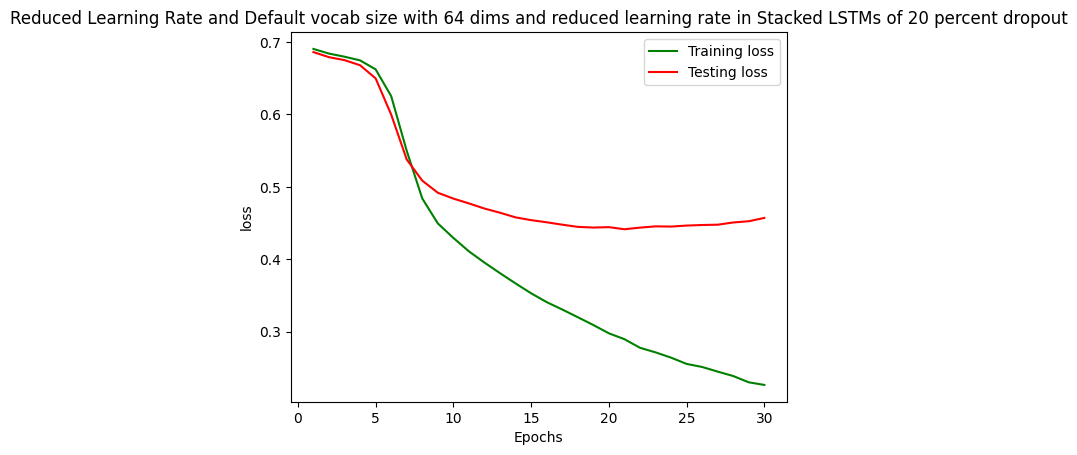

In [8]:
#Introducing dropouts on LSTM

model  = tf.keras.Sequential([
    tf.keras.layers.Embedding(20000,64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,return_sequences=True,dropout=0.2)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,dropout=0.2)),
    tf.keras.layers.Dense(24,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

adam = tf.keras.optimizers.Adam(learning_rate=0.000007)
model.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'])

history8 = model.fit(padded_training_headlines,training_labels_array,epochs=30,validation_data=(padded_testing_headlines,testing_labels_array))

train_loss = history8.history['loss']
validation_loss = history8.history['val_loss']
epochs = range(1,31)
plt.title("Reduced Learning Rate and Default vocab size with 64 dims and reduced learning rate in Stacked LSTMs of 20 percent dropout")
plt.plot(epochs,train_loss,"g",label="Training loss")
plt.plot(epochs,validation_loss,'r',label="Testing loss")
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

In [9]:
# The shooting of val loss is eliminated and the line is flattened out

In [8]:
#Transfer Learning
import os

glove_embeddings = {}

with open('glove.twitter.27B.25d.txt','r') as file:
    for line in file:
        contents = line.split()
        glove_embeddings[contents[0]] = np.asarray(contents[1:],dtype="float32")
    file.close()




In [9]:
# Reducing the vocab size for eliminating the overfitting

xs = []    # words index
ys = []    # 1 if in the embedding, 0 if not
cumulative_x=[]   
cumulative_y=[]     # quotient of the words in the embedding
total_y = 0


for word,index in tokenizer.word_index.items():
    xs.append(index)
    cumulative_x.append(index)
    if glove_embeddings.get(word) is not None:
        total_y = total_y+1
        ys.append(1)
    else:
        ys.append(0)
    cumulative_y.append(total_y/index)



27243


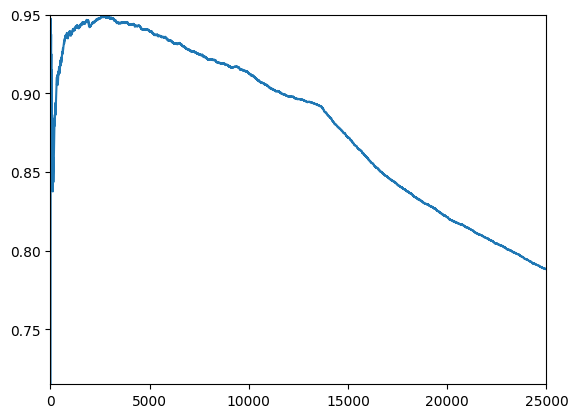

In [10]:
print(len(cumulative_x))

plt.plot(cumulative_x,cumulative_y)
plt.axis([0,25000,.715,.950])
plt.show()

In [33]:
#at around 13,000 thousand words , the graph tends to decrease implies the frequency of words that are not in embeddings tends to increase

# setting vocab size aroud 13,400 thousand words

In [11]:
# Creating the embedding matrix 

embedding_matrix = np.zeros((13400,25))
for word,index in tokenizer.word_index.items():
    if index==13400:
        break
    else:
        embedding_vector = glove_embeddings.get(word)
        if embedding_vector is not None:
            embedding_matrix[index] = embedding_vector


In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(13400, 25, 
weights=[embedding_matrix], trainable=False),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(25, 
return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(25)),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
adam = tf.keras.optimizers.Adam(learning_rate=0.00001, beta_1=0.9, beta_2=0.999,
amsgrad=False)
model.compile(loss='binary_crossentropy',optimizer=adam, metrics=['accuracy'])

2023-07-13 13:18:07.236841: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-07-13 13:18:07.237089: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-07-13 13:18:07.237235: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

Epoch 1/30


2023-07-13 13:07:27.987686: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-07-13 13:07:27.988804: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-07-13 13:07:27.989639: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

712/719 [============================>.] - ETA: 0s - loss: 0.6882 - accuracy: 0.5695

2023-07-13 13:07:38.542130: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-07-13 13:07:38.543235: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-07-13 13:07:38.543980: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

719/719 [==============================] - 12s 8ms/step - loss: 0.6881 - accuracy: 0.5693 - val_loss: 0.6842 - val_accuracy: 0.5894
Epoch 2/30
719/719 [==============================] - 5s 7ms/step - loss: 0.6808 - accuracy: 0.5983 - val_loss: 0.6776 - val_accuracy: 0.6177
Epoch 3/30
719/719 [==============================] - 5s 7ms/step - loss: 0.6734 - accuracy: 0.6215 - val_loss: 0.6704 - val_accuracy: 0.6290
Epoch 4/30
719/719 [==============================] - 5s 7ms/step - loss: 0.6649 - accuracy: 0.6355 - val_loss: 0.6619 - val_accuracy: 0.6363
Epoch 5/30
719/719 [==============================] - 5s 7ms/step - loss: 0.6548 - accuracy: 0.6483 - val_loss: 0.6521 - val_accuracy: 0.6422
Epoch 6/30
719/719 [==============================] - 5s 7ms/step - loss: 0.6436 - accuracy: 0.6547 - val_loss: 0.6422 - val_accuracy: 0.6455
Epoch 7/30
719/719 [==============================] - 5s 7ms/step - loss: 0.6326 - accuracy: 0.6599 - val_loss: 0.6328 - val_accuracy: 0.6522
Epoch 8/30
719/7

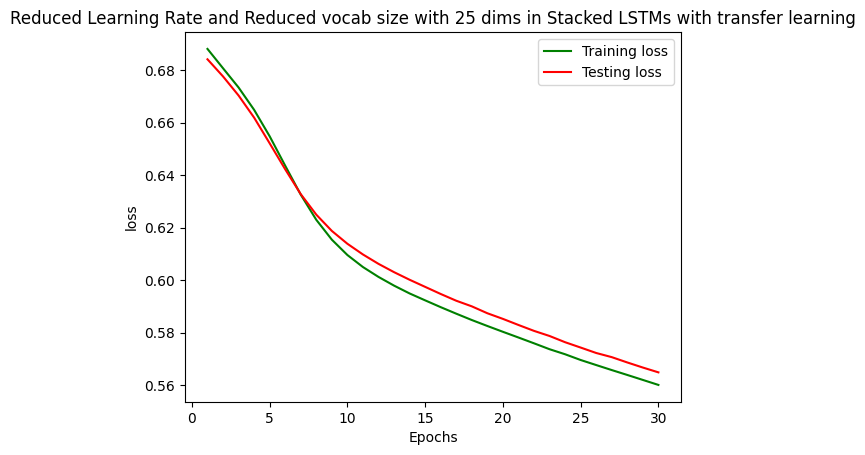

In [13]:
history9 = model.fit(padded_training_headlines,training_labels_array,epochs=30,validation_data=(padded_testing_headlines,testing_labels_array))

train_loss = history9.history['loss']
validation_loss = history9.history['val_loss']
epochs = range(1,31)
plt.title("Reduced Learning Rate and Reduced vocab size with 25 dims in Stacked LSTMs with transfer learning")
plt.plot(epochs,train_loss,"g",label="Training loss")
plt.plot(epochs,validation_loss,'r',label="Testing loss")
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

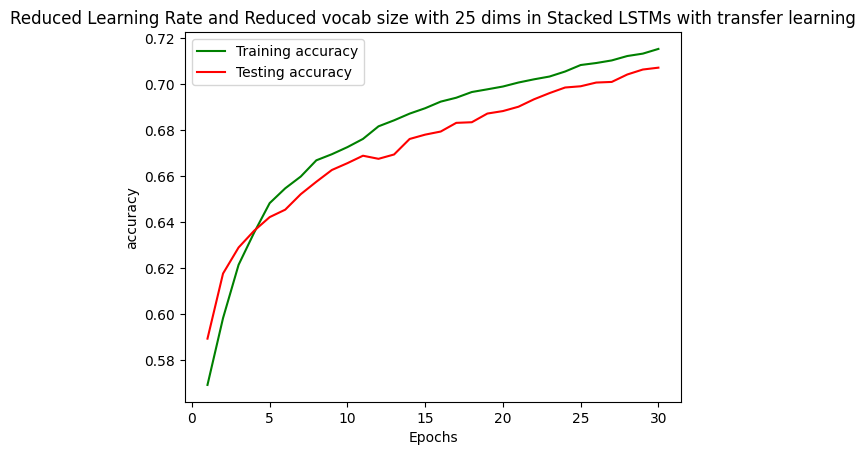

In [14]:
# Overfitting is eliminated , But lets see the accuracy curve

train_accuracy = history9.history['accuracy']
validation_accuracy = history9.history['val_accuracy']
epochs = range(1,31)
plt.title("Reduced Learning Rate and Reduced vocab size with 25 dims in Stacked LSTMs with transfer learning")
plt.plot(epochs,train_accuracy,"g",label="Training accuracy")
plt.plot(epochs,validation_accuracy,'r',label="Testing accuracy")
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()

In [15]:
# accuracy is close to training accuracy implies we are no longer overfitting

Epoch 1/150


2023-07-13 13:18:49.589007: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-07-13 13:18:49.590222: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-07-13 13:18:49.591731: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

718/719 [============================>.] - ETA: 0s - loss: 0.6831 - accuracy: 0.5734

2023-07-13 13:18:59.320888: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-07-13 13:18:59.322117: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-07-13 13:18:59.322856: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

719/719 [==============================] - 11s 8ms/step - loss: 0.6831 - accuracy: 0.5734 - val_loss: 0.6769 - val_accuracy: 0.5910
Epoch 2/150
719/719 [==============================] - 5s 7ms/step - loss: 0.6715 - accuracy: 0.6012 - val_loss: 0.6658 - val_accuracy: 0.6217
Epoch 3/150
719/719 [==============================] - 5s 7ms/step - loss: 0.6590 - accuracy: 0.6333 - val_loss: 0.6527 - val_accuracy: 0.6506
Epoch 4/150
719/719 [==============================] - 5s 7ms/step - loss: 0.6439 - accuracy: 0.6533 - val_loss: 0.6384 - val_accuracy: 0.6603
Epoch 5/150
719/719 [==============================] - 5s 7ms/step - loss: 0.6290 - accuracy: 0.6657 - val_loss: 0.6253 - val_accuracy: 0.6673
Epoch 6/150
719/719 [==============================] - 5s 7ms/step - loss: 0.6172 - accuracy: 0.6700 - val_loss: 0.6159 - val_accuracy: 0.6716
Epoch 7/150
719/719 [==============================] - 5s 7ms/step - loss: 0.6090 - accuracy: 0.6752 - val_loss: 0.6092 - val_accuracy: 0.6748
Epoch 8/15

ValueError: x and y must have same first dimension, but have shapes (30,) and (150,)

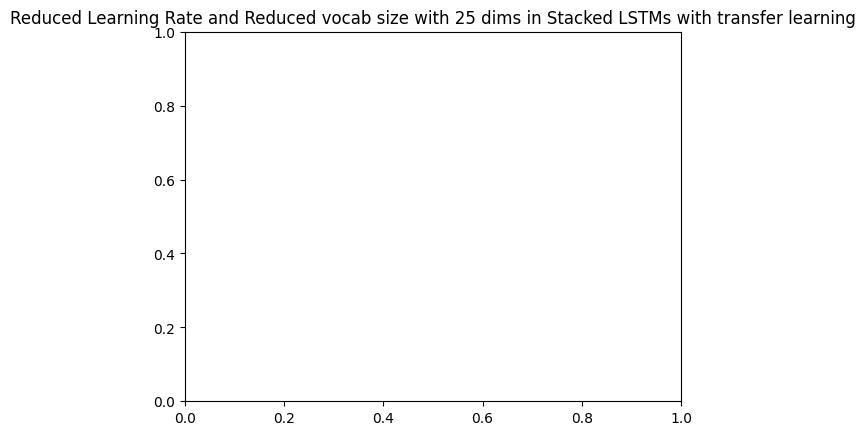

In [13]:
# training for 150 epochs
history10 = model.fit(padded_training_headlines,training_labels_array,epochs=150,validation_data=(padded_testing_headlines,testing_labels_array))



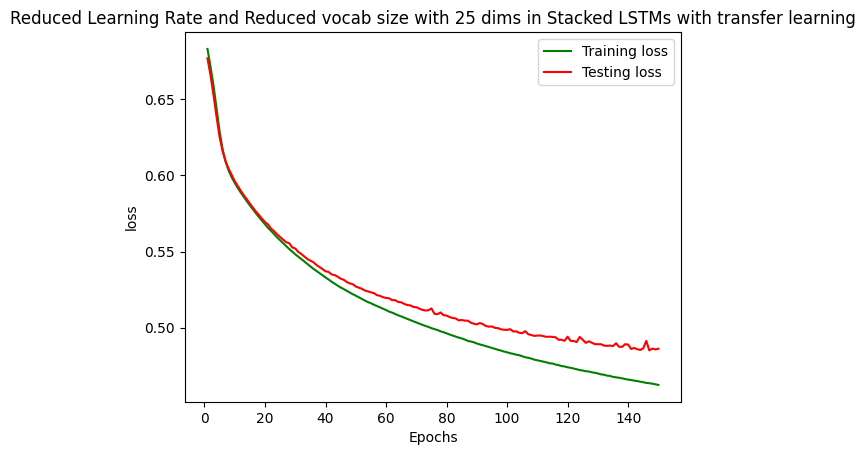

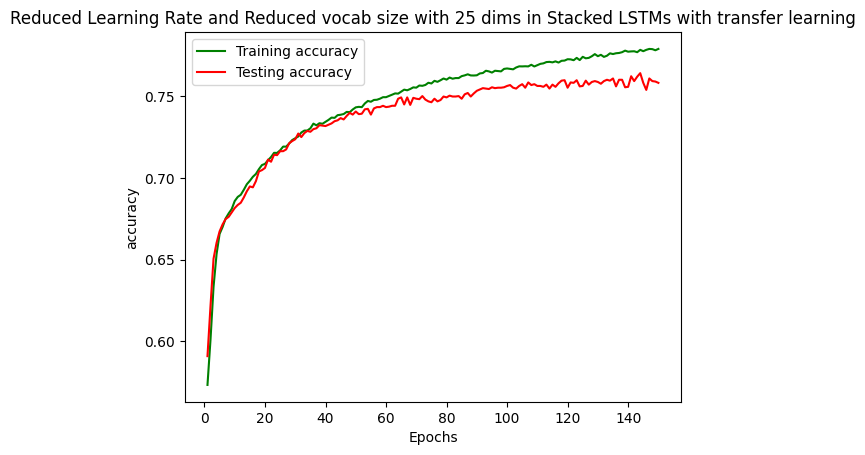

In [14]:
train_loss = history10.history['loss']
validation_loss = history10.history['val_loss']
epochs = range(1,151)
plt.title("Reduced Learning Rate and Reduced vocab size with 25 dims in Stacked LSTMs with transfer learning")
plt.plot(epochs,train_loss,"g",label="Training loss")
plt.plot(epochs,validation_loss,'r',label="Testing loss")
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

train_accuracy = history10.history['accuracy']
validation_accuracy = history10.history['val_accuracy']
epochs = range(1,151)
plt.title("Reduced Learning Rate and Reduced vocab size with 25 dims in Stacked LSTMs with transfer learning")
plt.plot(epochs,train_accuracy,"g",label="Training accuracy")
plt.plot(epochs,validation_accuracy,'r',label="Testing accuracy")
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()

In [15]:
#around 80 epochs , it starts to overfit slightly , so early stopping at 80 will be a good sign

In [16]:
test_sentences = ["It Was, For, Uh, Medical Reasons, Says Doctor To Boris Johnson,Explaining Why They Had To Give Him Haircut",

"It's a beautiful sunny day",

"I lived in Ireland, so in high school they made me learn to speak and write in Gaelic",

"Census Foot Soldiers Swarm Neighborhoods, Kick Down Doors To Tally Household Sizes"]


In [18]:
test_sequences = tokenizer.texts_to_sequences(test_sentences)
padded_test_sequences = pad_sequences(test_sequences,maxlen=max_length,padding=padding,truncating=truncating)

print(model.predict(padded_test_sequences))

2023-07-13 13:35:16.644923: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-07-13 13:35:16.646067: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-07-13 13:35:16.646912: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1/1 [==============================] - 1s 775ms/step
[[0.41093343]
 [0.04505569]
 [0.45275146]
 [0.6739249 ]]
